## Value iteration

Dans ce notebook, nous allons implémenter un algorithme de programmation dynamique appelé *value iteration*.
Nous allons parcourir l'espace des états et mettre à jour toutes les valeurs V(s).

Nous souhaitons trouver la **politique optimale**, *i.e.,* celle qui, à chaque état, prend l'action maximise le gain.

Seulement pour cela, nous devons connaitre $V^*(s)$ la valeur optimale de l'état qui peut suivre l'état courant.

Nous allons donc devoir estimer les valeurs de $V^*$ avec un processus itératif.

## Gérer les imports

In [32]:
import gym
import time
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from IPython import display

from bucket_env import BucketEnv3
from bucket_env import plot_stats, testing, rendering
%matplotlib inline

## Initialiser l'environnement
Pour créer l'environnement, il faut simplement créer une instance de `BucketEnv3`

In [33]:
env = BucketEnv3()

## Definition de la politique $\pi(\cdot|s)$

#### Création de la politique $\pi(\cdot|s)$

In [34]:
#Définit un objet multidimenssionnel
policy_probs = np.full((7,7,7,5),1/5)

In [35]:
def policy(state):
    return policy_probs[state]

In [36]:
policy(env.reset())

array([0.2, 0.2, 0.2, 0.2, 0.2])

#### Test de la politique avec l'état (0, 0, 0)

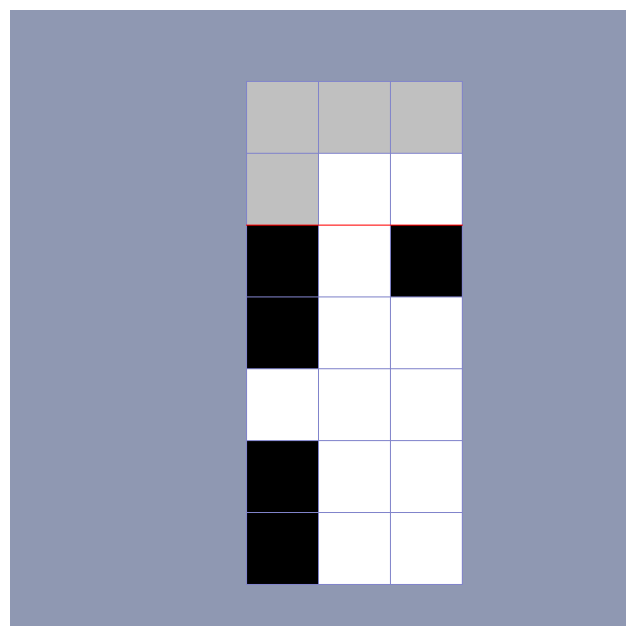

In [37]:
rendering(env,policy,episodes=2)

#### Voyons comment cela se comporte 

## Définition de la table de valeur $V(s)$

#### Création de la table $V(s)$

In [38]:
state_values = np.zeros((7,7,7))

## Implementation de l'algorithme

</br>

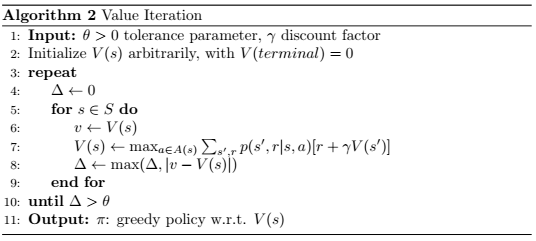
</br>
<div style="text-align:center">
    Adapted from Barto & Sutton: "Reinforcement Learning: An Introduction".
</div>



In [49]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float("inf")
    while delta > theta:
        delta = 0
        for x1 in range(5):
            for x2 in range(5):
                for x3 in range(2):
                    state = (x1,x2,x3)
                    old_value = state_values[state]

                    max_qsa = float("-inf")
                    max_action = None
                    for action in range(5):
                        next_state, reward, _, _ = env.simulate_step(state, action)
                        qsa =  reward + gamma * state_values[next_state]

                        if qsa > max_qsa:
                            max_qsa = qsa
                            max_action = np.zeros(5)
                            max_action[action] = 1.

                    state_values[state] = max_qsa
                    policy_probs[state] = max_action
                    delta = max(delta, abs(old_value - state_values[state]))

In [50]:
env.reset()
value_iteration(policy_probs,state_values)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

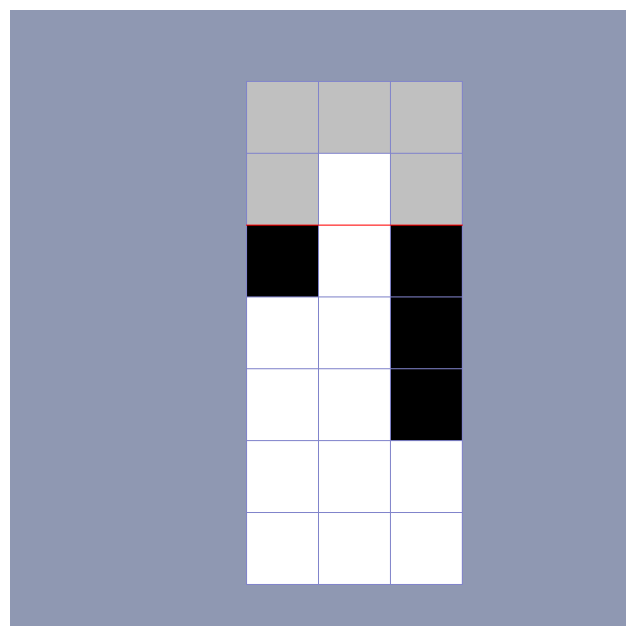

In [45]:
rendering(env,policy,episodes=2)